## Lab 3 - Springs and Model Fitting


***

Hooke's Law is a model which describes the relationship between the force $\vec{F}$ and stretch $\Delta x$ of a spring.  

$$ F = -k \Delta x$$

Here, the negative sign indicates the force always acts opposite to displacement.  Regardless of whether you stretch or compress the spring, it always wants to return back to its equilibrium length.  The constant $k$ is called the spring constant, and measures how stiff the spring is.  It has units of N/m, and tells us how many newtons of force must be applied to stretch the spring 1 m.

Over the next two lab sessions, you will develop a number of experiments to test this model under a number of conditions.

Some research questions you may want to consider:

* How do measurements taken at the same position compare over time?

* How does the validity of Hooke's law depend on the spring or material used?

* How do measurements at the same position compare when the string is being stretched, vs. relaxed?

* Are there modifications you can make to Hooke's law to account for limitations?

* Do springs have regions where Hooke's law applies, and other regions where it doesn't?

Those are just things to think about as you design your experiments.

***

### Experimental procedure:

If we hang a mass from the spring, the force applied to the spring is $mg$.  Re-arranging Hooke's law to solve for displacement, we get:

$$ mg = k \Delta x $$

Here we have dropped the negative sign, since it doesn't really matter which way the spring is moving.

You should measure the extension of the spring from equilibrium for a number of different masses.  You will then make a plot of $m$ vs. $\Delta x$, and fit your data with a straight line (details below).  The slope of your line will then be $k$.

Some things to think about before starting your experiment:

* How many data points do you need?  In theory you only need 2 points to define a line, but you should probably have more.

* How many sets of measurements do you want?  With multiple sets of data, you can estimate the uncertainty of each point, plus see if there are any trends over time.

* Does your spring constant change if the spring is being stretched vs. relaxed?

For week one, you should spend time thinking about answers to the above questions. Then conduct a series of measurements, make a plot of mass vs. $\Delta x$, and find the spring constant for your spring.

In week two, you should find some stretchy objects around the house to bring in.  It could be a rubber band, a hair tie, or whatever you can find that will stretch.  Your group will perform a similar experiment to find the spring constant for your object, and to see if it obeys Hooke's law at all.  If your house is completely devoid of stretchy objects, we may have a few to measure.

***

#### Plotting and fitting data in Python

Below are details on how to plot and fit data with a straight line in Python.  First, let's generate some fake data.  You can ignore this step, since you will have your own data to use.

In [1]:
import numpy as np

x = np.arange(0,10) # Don't worry too much about these lines, just generating fake data
np.random.seed(1)
y = 2.5*x + np.random.randn(10)

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1.62434536  1.88824359  4.47182825  6.42703138 10.86540763 10.1984613
 16.74481176 16.7387931  20.3190391  22.25062962]


Here $x$ is an evenly spaced array from 0 to 9, and $y$ is defined by $y=2.5 x$, plus some random noise added in (since our data won't be perfect).

To plot our data, we use a Python library called `matplotlib`, which is similar to Matlab in terms of commands.  There are other ways to make plots in Python, but this is the simplest.

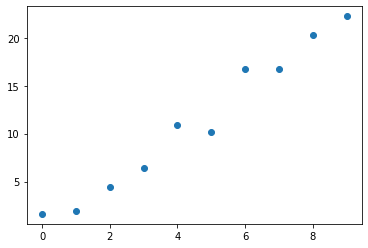

In [2]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.show()

In the commands above, the `'o'` tells Python to use a dot for each point.  We can also add axis labels, and make their font sizes a little larger if we want.

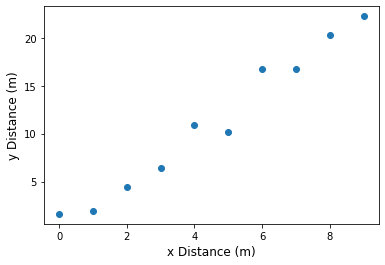

In [3]:
plt.plot(x,y,'o')
plt.xlabel('x Distance (m)',size='large')
plt.ylabel('y Distance (m)',size='large')
plt.show()

To fit our data, we will use a function from `numpy` called `polyfit`.  This fits our data with a polynomial (whose degree we can specify), and then spits out the best fit parameters.  In this case, we expect our data to be a straight line, so we will fit it with a 1st order polynomial.

In [4]:
p = np.polyfit(x,y,1)  # The 1 here means first order
print(p)

[2.4622627  0.07267695]


Polyfit always returns the highest power of $x$ first, so that means our straight line equation is $y = 2.462 x +0.073$.

Now we need to plot our best fit line on our graph.  `numpy` has another function called `poly1d` which creates a polynomial.  If we give `poly1d` the best-fit values from our fit above, and tell it to calculate values for that polynomial at our `x` values, we can then plot them.

In [5]:
f = np.poly1d(p)
print(f)

 
2.462 x + 0.07268


Note that `poly1d` will actually show us the equation from our fit.  If we want to evaluate that function at our values of $x$,

In [6]:
f(x)

array([ 0.07267695,  2.53493965,  4.99720235,  7.45946505,  9.92172776,
       12.38399046, 14.84625316, 17.30851587, 19.77077857, 22.23304127])

Okay, now we are ready to plot our data points and the best-fit line.  For our fit, we can connect all of the data points with a straight line using a different symbol.

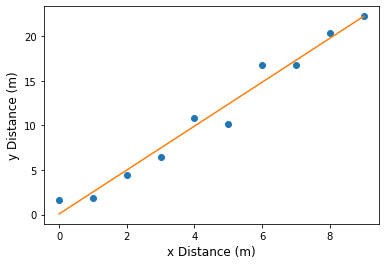

In [7]:
plt.plot(x,y,'o')
plt.plot(x,f(x),'-')
plt.xlabel('x Distance (m)',size='large')
plt.ylabel('y Distance (m)',size='large')
plt.show()

Overall we can see the fit is not too bad.  So we can report that our data are well fit by a straight line, with a slope of $2.462$ and a y-intercept of $+0.07268$.

***

#### Other usefull skills:

In earlier labs, you may have noticed that sometimes we use the command `np.array()` to convert a regular Python array to a numpy array.  What is the difference between the two?  Let's look at an example.

First, let's define two simple arrays.

In [8]:
a=[1,2,3]
b=[4,5,6]

If I try to multiply one array by a constant, the following happens:

In [9]:
print(a*3)

[1, 2, 3, 1, 2, 3, 1, 2, 3]


If I try to add the arrays, I get:

In [10]:
print(a+b)

[1, 2, 3, 4, 5, 6]


Most of the time, that's not what we want.  However if we convert our arrays to numpy arrays first.....

In [11]:
a = np.array(a)
b = np.array(b)

print('a times 3 = ',a*3)

print ('a plus 2 = ',a+2)

print('a+b = ', a+b)

a times 3 =  [3 6 9]
a plus 2 =  [3 4 5]
a+b =  [5 7 9]


Here Python multiplies each element in list `a` by 3, and then adds the individual elements in `a` and `b`.  This can be useful if we want to multiply or divide all of the elements in an array by a constant, or if we want to add or subtract a value to each element in an array.  Note that if we are adding two arrays they must have the same length, or else Python will thrown an exception.

***

When trying to see whether a particular model provides an adequate fit to data, one of the more useful tools is a plot of the residuals.  Simply stated, the residuals are the value of the measured data at each point, minus the value of the model at that point.  We can easily make a plot like so:

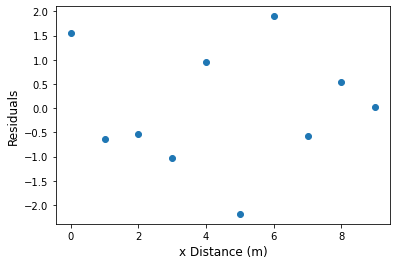

In [12]:
plt.plot(x,y-f(x),'o')
plt.xlabel('x Distance (m)',size='large')
plt.ylabel('Residuals',size='large')
plt.show()

If our model is a good fit, we should notice two things.  First, the residuals should be randomly scattered around zero.  We should not see a pattern where the residuals are systematically above zero, then below zero, etc. for different parts of the data.  Here is a plot of data where the residuals show the model is a poor fit:

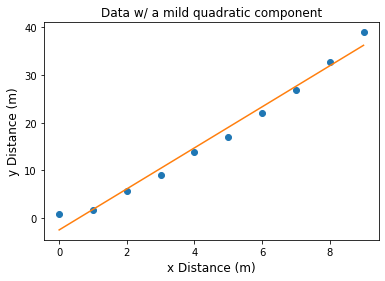

In [13]:
y2 = 2.5 * x + 0.2*x**2 + 0.5*np.random.randn(10)
q = np.polyfit(x,y2,1)
g = np.poly1d(q)
plt.plot(x,y2,'o')
plt.plot(x,g(x),'-')
plt.xlabel('x Distance (m)',size='large')
plt.ylabel('y Distance (m)',size='large')
plt.title('Data w/ a mild quadratic component')
plt.show()

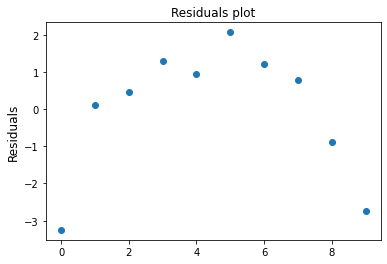

In [14]:
plt.plot(x,g(x)-y2,'o')
plt.ylabel('Residuals',size='large')
plt.title('Residuals plot',size='large')
plt.show()

In the function above, I added a slight quadratic component to the original function.  While a linear trendline still looks like a good fit, you can see the residuals start out below zero, then trend above zero for a few points, then drop back below zero.  This indicates a linear fit may be the wrong choice.

***

### To be submitted with your lab report:

* Header w/ the usual info

* Explanation of how you gathered data for your spring, why you chose the number of data points that you did, the range of masses you chose, etc.

* Plot of $F$ vs. $\Delta x$ w/ trendline, and your best estimate of the spring constant

* Any additional investigations you carried out, regarding multiple measurements, stretching vs. relaxing, limits to Hooke's law, etc.

* Data and plots for any additional "stretchy" objects you have

* Residuals plot and discussion of whether Hooke's law is a good fit for your objects